In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import csv
import re
sns.set()

In [48]:
wiki_table = '''John Jay,43,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmedSep. 26, 1789",2
John Rutledge,50,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmedSep. 26, 1789",2
William Cushing,57,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmedSep. 26, 1789",2
James Wilson,47,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmedSep. 26, 1789",2
John Blair Jr.,57,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmedSep. 26, 1789",2
Robert H. Harrison,44,Washington,None,Inaugural,Pro Admin,"Sep. 24, 1789","confirmed[B]Sep. 26, 1789",2
James Iredell,38,Washington,None,Inaugural,Pro Admin,"Feb. 8, 1790","confirmedFeb. 10, 1790",2
Thomas Johnson[C],58,Washington,None,J. Rutledge,Pro Admin,"Oct. 31, 1791","confirmedNov. 7, 1791",7
William Paterson,47,Washington,None,T. Johnson,Pro Admin,"Feb. 27, 1793","withdrawnFeb. 28, 1793",1
William Paterson,47,Washington,None,T. Johnson,Pro Admin,"Mar. 4, 1793","confirmedMar. 4, 1793",0
John Rutledge[C],56,Washington,None,Jay,Federalist,"Dec. 10, 1795","rejected (10–14)[D]Dec. 15, 1795",5
William Cushing[E],63,Washington,None,Rutledge,Federalist,"Jan. 26, 1796","confirmed[F]Jan. 27, 1796",1
Samuel Chase,54,Washington,None,Blair,Federalist,"Jan. 26, 1796","confirmedJan. 27, 1796",1
Oliver Ellsworth,50,Washington,None,Rutledge,Federalist,"Mar. 3, 1796","confirmed (21–1)Mar. 4, 1796",1
Bushrod Washington[C],36,J. Adams,Federalist,Wilson,Federalist,"Dec. 19, 1798","confirmedDec. 20, 1798",1
Alfred Moore,44,J. Adams,Federalist,Iredell,Federalist,"Dec. 4, 1799","confirmedDec. 10, 1799",6
John Jay,55,J. Adams,Federalist,Ellsworth,Federalist,"Dec. 18, 1800","confirmed[B]Dec. 19, 1800",1
John Marshall,45,J. Adams,Federalist,Ellsworth,Federalist,"Jan. 20, 1801","confirmedJan. 27, 1801",7
William Johnson,32,Jefferson,Dem-Rep,Moore,Dem-Rep,"Mar. 22, 1804","confirmedMar. 24, 1804",2
Henry B. Livingston[C],49,Jefferson,Dem-Rep,Paterson,Dem-Rep,"Dec. 13, 1806","confirmedDec. 17, 1806",4
Thomas Todd,42,Jefferson,Dem-Rep,new seat,Dem-Rep,"Feb. 28, 1807","confirmedMar. 2, 1807",2
Levi Lincoln Sr.,61,Madison,Dem-Rep,W. Cushing,Dem-Rep,"Jan. 2, 1811","confirmed[B]Jan. 3, 1811",1
Alexander Wolcott,52,Madison,Dem-Rep,W. Cushing,Dem-Rep,"Feb. 4, 1811","rejected (9–24)Feb. 13, 1811",9
John Quincy Adams,43,Madison,Dem-Rep,W. Cushing,Dem-Rep,"Feb. 21, 1811","confirmed[B]Feb. 22, 1811",1
Joseph Story,32,Madison,Dem-Rep,W. Cushing,Dem-Rep,"Nov. 15, 1811","confirmedNov. 18, 1811",3
Gabriel Duvall,58,Madison,Dem-Rep,S. Chase,Dem-Rep,"Nov. 15, 1811","confirmedNov. 18, 1811",3
Smith Thompson[C],55,Monroe,Dem-Rep,Livingston,Dem-Rep,"Dec. 5, 1823","confirmedDec. 9, 1823",4
Robert Trimble,49,J. Q. Adams,Rep (A-C)[G],Todd,Rep (J–C)[G],"Apr. 11, 1826","confirmed (27–5)May 9, 1826",28
John J. Crittenden,41,J. Q. Adams,Rep (A-C),Trimble,Rep (J-C),"Dec. 17, 1828",postponed,57[H]
John McLean,43,Jackson,Democratic,Trimble,Democratic,"Mar. 6, 1829","confirmedMar. 7, 1829",1
Henry Baldwin,49,Jackson,Democratic,Washington,Democratic,"Jan. 4, 1830","confirmed (41–2)Jan. 6, 1830",2
James Moore Wayne,57,Jackson,Democratic,W. Johnson,Natl Rep,"Jan. 6, 1835","confirmedJan. 9, 1835",3
Roger B. Taney,57,Jackson,Democratic,Duvall,Natl Rep,"Jan. 15, 1835",postponed,47[H]
Roger B. Taney,58,Jackson,Democratic,Marshall,Democratic,"Dec. 28, 1835","confirmed (29–15)Mar. 15, 1836",78
Philip P. Barbour,52,Jackson,Democratic,Duvall,Democratic,"Dec. 28, 1835","confirmed (30–11)Mar. 15, 1836",78
John Catron,51,Jackson,Democratic,new seat,Democratic,"Mar. 3, 1837","confirmed (28–15)Mar. 8, 1837",5
William Smith,74,Jackson,Democratic,new seat,Democratic,"Mar. 3, 1837","confirmed[B] (23–18)Mar. 8, 1837",5
John McKinley[C],57,Van Buren,Democratic,new seat,Democratic,"Sep. 18, 1837","confirmedSep. 25, 1837",7
Peter Vivian Daniel,56,Van Buren,Democratic,Barbour,Democratic,"Feb. 26, 1841","confirmed (25–5)Mar. 2, 1841",4
John C. Spencer,56,Tyler,None,Thompson,Whig,"Jan. 8, 1844","rejected (21–26)Jan. 31, 1844",23
Reuben Walworth,55,Tyler,None,Thompson,Whig,"Mar. 13, 1844","withdrawnJune 17, 1844",96
Edward King,50,Tyler,None,Baldwin,Whig,"June 5, 1844",postponed,10[H]
John C. Spencer,56,Tyler,None,Thompson,Whig,"June 17, 1844","withdrawnJune 17, 1844",0
Reuben Walworth,55,Tyler,None,Thompson,Whig,"June 17, 1844",lapsed,N/A
Reuben Walworth,56,Tyler,None,Thompson,Whig,"Dec. 4, 1844","withdrawnFeb. 6, 1845",64
Edward King,50,Tyler,None,Baldwin,Whig,"Dec. 4, 1844","withdrawnFeb. 8, 1845",66
Samuel Nelson,52,Tyler,None,Thompson,Whig,"Feb. 4, 1845","confirmedFeb. 14, 1845",10
John M. Read,47,Tyler,None,Baldwin,Whig,"Feb. 7, 1845",lapsed,N/A
George Woodward,36,Polk,Democratic,Baldwin,Democratic,"Dec. 23, 1845","rejected (20–29)Jan. 22, 1846",30
Levi Woodbury[C],56,Polk,Democratic,Story,Democratic,"Dec. 23, 1845","confirmedJan. 3, 1846",11
Robert Cooper Grier,52,Polk,Democratic,Baldwin,Democratic,"Aug. 3, 1846","confirmedAug. 4, 1846",1
Benjamin R. Curtis[C],42,Fillmore,Whig,Woodbury,Democratic,"Dec. 11, 1851","confirmedDec. 23, 1851",12
Edward A. Bradford,38,Fillmore,Whig,McKinley,Democratic,"Aug. 16, 1852",lapsed,N/A
George E. Badger,57,Fillmore,Whig,McKinley,Democratic,"Jan. 3, 1853","withdrawnFeb. 14, 1853",43
William C. Micou,46,Fillmore,Whig,McKinley,Democratic,"Feb. 14, 1853",lapsed,N/A
John A. Campbell,41,Pierce,Democratic,McKinley,Democratic,"Mar. 21, 1853","confirmedMar. 22, 1853",1
Nathan Clifford,54,Buchanan,Democratic,Curtis,Democratic,"Dec. 9, 1857","confirmed (26–23)Jan. 12, 1858",34
Jeremiah S. Black,51,Buchanan,Democratic,Daniel,Democratic,"Feb. 5, 1861",lapsed,N/A
Noah Haynes Swayne,57,Lincoln,Republican,McLean,Republican,"Jan. 21, 1862","confirmed (38–1)Jan. 24, 1862",3
Samuel Freeman Miller,46,Lincoln,Republican,Daniel,Republican,"July 16, 1862","confirmedJuly 16, 1862",0
David Davis[C],47,Lincoln,Republican,Campbell,Republican,"Dec. 1, 1862","confirmedDec. 8, 1862",7
Stephen Johnson Field,46,Lincoln,Republican,new seat,Republican,"Mar. 6, 1863","confirmedMar. 10, 1863",4
Salmon P. Chase,56,Lincoln,Republican,Taney,Republican,"Dec. 6, 1864","confirmedDec. 6, 1864",0
Henry Stanbery,63,A. Johnson,Natl Union,Catron,Republican,"Apr. 16, 1866",lapsed[I],N/A
Ebenezer R. Hoar,53,Grant,Republican,new seat,Republican,"Dec. 14, 1869","rejected (24–33)Feb. 3, 1870",51
Edwin Stanton,55,Grant,Republican,Grier,Republican,"Dec. 20, 1869","confirmed[J] (46–11)Dec. 20, 1869",0
William Strong,61,Grant,Republican,Grier,Republican,"Feb. 7, 1870","confirmed Feb. 18, 1870",11
Joseph P. Bradley,56,Grant,Republican,new seat,Republican,"Feb. 7, 1870","confirmed (46–9)Mar. 21, 1870",42
Ward Hunt,62,Grant,Republican,Nelson,Republican,"Dec. 3, 1872","confirmedDec. 11, 1872",8
George Henry Williams,50,Grant,Republican,S. P. Chase,Republican,"Dec. 1, 1873","withdrawnJan. 8, 1874",38
Caleb Cushing,73,Grant,Republican,S. P. Chase,Republican,"Jan. 9, 1874","withdrawnJan. 13, 1874",4
Morrison Waite,57,Grant,Republican,S. P. Chase,Republican,"Jan. 19, 1874","confirmed (63–0)Jan. 21, 1874",2
John Marshall Harlan,44,Hayes,Republican,Davis,Republican,"Oct. 16, 1877","confirmedNov. 29, 1877",44
William Burnham Woods,56,Hayes,Republican,Strong,Democratic,"Dec. 15, 1880","confirmed (39–8)Dec. 21, 1880",6
Stanley Matthews,56,Hayes,Republican,Swayne,Democratic,"Jan. 26, 1881",lapsed,N/A
Stanley Matthews,56,Garfield,Republican,Swayne,Split,"Mar. 14, 1881","confirmed (24–23)May 12, 1881",59
Horace Gray,53,Arthur,Republican,Clifford,Split,"Dec. 19, 1881","confirmed (51–5)Dec. 20, 1881",1
Roscoe Conkling,52,Arthur,Republican,Hunt,Split,"Feb. 24, 1882","confirmed[B] (39–12)Mar. 2, 1882",6
Samuel Blatchford,62,Arthur,Republican,Hunt,Split,"Mar. 13, 1882","confirmedMar. 22, 1882",9
Lucius Q. C. Lamar II,62,Cleveland,Democratic,Woods,Republican,"Dec. 6, 1887","confirmed (32–28)Jan. 16, 1888",41
Melville Fuller,55,Cleveland,Democratic,Waite,Republican,"Apr. 30, 1888","confirmed (41–20)July 20, 1888",81
David Josiah Brewer,52,B. Harrison,Republican,Matthews,Republican,"Dec. 4, 1889","confirmed (53–11)Dec. 18, 1889",14
Henry Billings Brown,54,B. Harrison,Republican,Miller,Republican,"Dec. 23, 1890","confirmedDec. 29, 1890",6
George Shiras Jr.,60,B. Harrison,Republican,Bradley,Republican,"July 19, 1892","confirmedJuly 26, 1892",7
Howell E. Jackson,60,B. Harrison,Republican,L. Lamar,Republican,"Feb. 2, 1893","confirmedFeb. 18, 1893",16
William B. Hornblower,42,Cleveland,Democratic,Blatchford,Democratic,"Sep. 19, 1893",lapsed,N/A
William B. Hornblower,42,Cleveland,Democratic,Blatchford,Democratic,"Dec. 5, 1893","rejected (24–30)Jan. 15, 1894",41
Wheeler H. Peckham,61,Cleveland,Democratic,Blatchford,Democratic,"Jan. 22, 1894","rejected (32–41)Feb. 16, 1894",25
Edward D. White,48,Cleveland,Democratic,Blatchford,Democratic,"Feb. 19, 1894","confirmedFeb. 19, 1894",0
Rufus W. Peckham,57,Cleveland,Democratic,H. Jackson,Republican,"Dec. 3, 1895","confirmedDec. 9, 1895",6
Joseph McKenna,54,McKinley,Republican,Field,Republican,"Dec. 16, 1897","confirmedJan. 21, 1898",36
Oliver W. Holmes Jr.,61,T. Roosevelt,Republican,Gray,Republican,"Dec. 2, 1902","confirmedDec. 4, 1902",2
William R. Day,53,T. Roosevelt,Republican,Shiras,Republican,"Feb. 19, 1903","confirmedFeb. 23, 1903",4
William Henry Moody,52,T. Roosevelt,Republican,Brown,Republican,"Dec. 3, 1906","confirmedDec. 12, 1906",9
Horace Harmon Lurton,65,Taft,Republican,R. Peckham,Republican,"Dec. 13, 1909","confirmedDec. 20, 1909",7
Charles Evans Hughes,48,Taft,Republican,Brewer,Republican,"Apr. 25, 1910","confirmedMay 2, 1910",7
Edward D. White[E],65,Taft,Republican,Fuller,Republican,"Dec. 12, 1910","confirmedDec. 12, 1910",0
Willis Van Devanter,51,Taft,Republican,E. D. White,Republican,"Dec. 12, 1910","confirmedDec. 15, 1910",3
Joseph Rucker Lamar,53,Taft,Republican,Moody,Republican,"Dec. 12, 1910","confirmedDec. 15, 1910",3
Mahlon Pitney,54,Taft,Republican,J. Harlan,Republican,"Feb. 19, 1912","confirmed (50–26)Mar. 13, 1912",23
James C. McReynolds,52,Wilson,Democratic,Lurton,Democratic,"Aug. 19, 1914","confirmed (44–6)Aug. 29, 1914",10
Louis Brandeis,59,Wilson,Democratic,J. Lamar,Democratic,"Jan. 28, 1916","confirmed (47–22)June 1, 1916",125
John Hessin Clarke,58,Wilson,Democratic,Hughes,Democratic,"July 14, 1916","confirmedJuly 24, 1916",10
William Howard Taft,63,Harding,Republican,E. D. White,Republican,"June 30, 1921","confirmedJune 30, 1921",0
George Sutherland,60,Harding,Republican,Clarke,Republican,"Sep. 5, 1922","confirmedSep. 5, 1922",0
Pierce Butler,56,Harding,Republican,Day,Republican,"Nov. 21, 1922",lapsed,N/A
Pierce Butler,56,Harding,Republican,Day,Republican,"Dec. 5, 1922","confirmed (61–8)Dec. 21, 1922",16
Edward Terry Sanford,57,Harding,Republican,Pitney,Republican,"Jan. 24, 1923","confirmedJan. 29, 1923",5
Harlan F. Stone,52,Coolidge,Republican,McKenna,Republican,"Jan. 5, 1925","confirmed (71–6)Feb. 5, 1925",31
Charles Evans Hughes,67,Hoover,Republican,Taft,Republican,"Feb. 3, 1930","confirmed (52–26)Feb. 13, 1930",10
John J. Parker,44,Hoover,Republican,Sanford,Republican,"Mar. 21, 1930","rejected (39–41)May 7, 1930",47
Owen Roberts,55,Hoover,Republican,Sanford,Republican,"May 9, 1930","confirmedMay 20, 1930",11
Benjamin N. Cardozo,61,Hoover,Republican,Holmes,Republican,"Feb. 15, 1932","confirmedFeb. 24, 1932",9
Hugo Black,51,F. D. Roosevelt,Democratic,Van Devanter,Democratic,"Aug. 12, 1937[K]","confirmed (63–16)Aug. 17, 1937",5
Stanley Forman Reed,53,F. D. Roosevelt,Democratic,Sutherland,Democratic,"Jan. 15, 1938","confirmedJan. 25, 1938",10
Felix Frankfurter,56,F. D. Roosevelt,Democratic,Cardozo,Democratic,"Jan. 5, 1939","confirmedJan. 17, 1939",12
William O. Douglas,40,F. D. Roosevelt,Democratic,Brandeis,Democratic,"Mar. 20, 1939","confirmed (62–4)Apr. 4, 1939",15
Frank Murphy,49,F. D. Roosevelt,Democratic,Butler,Democratic,"Jan. 4, 1940","confirmedJan. 16, 1940",14
Harlan F. Stone[E],68,F. D. Roosevelt,Democratic,Hughes,Democratic,"June 12, 1941","confirmedJune 27, 1941",15
James F. Byrnes,59,F. D. Roosevelt,Democratic,McReynolds,Democratic,"June 12, 1941","confirmedJune 12, 1941",0
Robert H. Jackson,49,F. D. Roosevelt,Democratic,Stone,Democratic,"June 12, 1941","confirmedJuly 7, 1941",25
Wiley Blount Rutledge,48,F. D. Roosevelt,Democratic,Byrnes,Democratic,"Jan. 11, 1943","confirmedFeb. 8, 1943",28
Harold Hitz Burton,57,Truman,Democratic,O. Roberts,Democratic,"Sep. 19, 1945","confirmedSep. 19, 1945",0
Fred M. Vinson,56,Truman,Democratic,Stone,Democratic,"June 6, 1946","confirmedJune 20, 1946",14
Tom C. Clark,49,Truman,Democratic,Murphy,Democratic,"Aug. 2, 1949","confirmed (73–8)Aug. 18, 1949",16
Sherman Minton,58,Truman,Democratic,W. Rutledge,Democratic,"Sep. 15, 1949","confirmed (48–16)Oct. 4, 1949",19
Earl Warren[C],62,Eisenhower,Republican,Vinson,Republican,"Jan. 11, 1954","confirmedMar. 1, 1954",49
John Marshall Harlan II,55,Eisenhower,Republican,R. Jackson,Republican,"Nov. 9, 1954",lapsed,N/A
John Marshall Harlan II,55,Eisenhower,Republican,R. Jackson,Democratic,"Jan. 10, 1955","confirmed (71–11)Mar. 16, 1955",65
William J. Brennan Jr.[C],50,Eisenhower,Republican,Minton,Democratic,"Jan. 14, 1957","confirmedMar. 19, 1957",64
Charles Evans Whittaker,56,Eisenhower,Republican,Reed,Democratic,"Mar. 2, 1957","confirmedMar. 19, 1957",17
Potter Stewart[C],43,Eisenhower,Republican,Burton,Democratic,"Jan. 17, 1959","confirmed (70–17)May 5, 1959",108
Byron White,44,Kennedy,Democratic,Whittaker,Democratic,"Apr. 3, 1962","confirmedApr. 11, 1962",8
Arthur Goldberg,54,Kennedy,Democratic,Frankfurter,Democratic,"Aug. 31, 1962","confirmedSep. 25, 1962",25
Abe Fortas,55,L. Johnson,Democratic,Goldberg,Democratic,"July 28, 1965","confirmedAug. 11, 1965",14
Thurgood Marshall,58,L. Johnson,Democratic,Clark,Democratic,"June 13, 1967","confirmed (69–11)Aug. 30, 1967",78
Abe Fortas[E],58,L. Johnson,Democratic,Warren,Democratic,"June 26, 1968","withdrawn[L]Oct. 2, 1968",98
Homer Thornberry,59,L. Johnson,Democratic,Fortas,Democratic,"June 26, 1968","withdrawnOct. 2, 1968",98
Warren E. Burger,61,Nixon,Republican,Warren,Democratic,"May 23, 1969","confirmed (74–3)June 9, 1969",17
Clement Haynsworth,56,Nixon,Republican,Fortas,Democratic,"Aug. 21, 1969","rejected (45–55)Nov. 21, 1969",92
G. Harrold Carswell,50,Nixon,Republican,Fortas,Democratic,"Jan. 19, 1970","rejected (45–51)Apr. 8, 1970",79
Harry Blackmun,61,Nixon,Republican,Fortas,Democratic,"Apr. 15, 1970","confirmed (94–0)May 12, 1970",27
Lewis F. Powell Jr.,64,Nixon,Republican,H. Black,Democratic,"Oct. 22, 1971","confirmed (89–1)Dec. 6, 1971",45
William Rehnquist,47,Nixon,Republican,J. Harlan II,Democratic,"Oct. 22, 1971","confirmed (68–26)Dec. 10, 1971",49
John Paul Stevens,55,Ford,Republican,Douglas,Democratic,"Nov. 28, 1975","confirmed (98–0)Dec. 17, 1975",19
Sandra Day O'Connor,51,Reagan,Republican,Stewart,Republican,"Aug. 19, 1981","confirmed (99–0)Sep. 21, 1981",33
William Rehnquist[E],61,Reagan,Republican,Burger,Republican,"June 20, 1986","confirmed (65–33)Sep. 17, 1986",89
Antonin Scalia,50,Reagan,Republican,Rehnquist,Republican,"June 24, 1986","confirmed (98–0)Sep. 17, 1986",85
Robert Bork,60,Reagan,Republican,Powell,Democratic,"July 1, 1987","rejected (42–58)Oct. 23, 1987",114
Anthony Kennedy,51,Reagan,Republican,Powell,Democratic,"Nov. 30, 1987","confirmed (97–0)Feb. 3, 1988",65
David Souter,50,G. H. W. Bush,Republican,Brennan,Democratic,"July 25, 1990","confirmed (90–9)Oct. 2, 1990",69
Clarence Thomas,43,G. H. W. Bush,Republican,T. Marshall,Democratic,"July 8, 1991","confirmed (52–48)Oct. 15, 1991",99
Ruth Bader Ginsburg,60,Clinton,Democratic,B. White,Democratic,"June 22, 1993","confirmed (96–3)Aug. 3, 1993",42
Stephen Breyer,55,Clinton,Democratic,Blackmun,Democratic,"May 17, 1994","confirmed (87–9)July 29, 1994",73
John Roberts,50,G. W. Bush,Republican,O'Connor,Republican,"July 29, 2005","withdrawnSep. 6, 2005",39
John Roberts,50,G. W. Bush,Republican,Rehnquist,Republican,"Sep. 6, 2005","confirmed (78–22)Sep. 29, 2005",23
Harriet Miers,60,G. W. Bush,Republican,O'Connor,Republican,"Oct. 7, 2005","withdrawnOct. 28, 2005",21
Samuel Alito,55,G. W. Bush,Republican,O'Connor,Republican,"Nov. 10, 2005","confirmed (58–42)Jan. 31, 2006",82
Sonia Sotomayor,54,Obama,Democratic,Souter,Democratic,"June 1, 2009","confirmed (68–31)Aug. 6, 2009",66
Elena Kagan,50,Obama,Democratic,Stevens,Democratic,"May 10, 2010","confirmed (63–37)Aug. 5, 2010",87
Merrick Garland,63,Obama,Democratic,Scalia,Republican,"Mar. 16, 2016",lapsed,293
Neil Gorsuch,49,Trump,Republican,Scalia,Republican,"Feb. 1, 2017","confirmed (54–45)Apr. 7, 2017",65
Brett Kavanaugh,53,Trump,Republican,Kennedy,Republican,"July 10, 2018","confirmed (50–48)Oct. 6, 2018",88
Amy Coney Barrett,48,Trump,Republican,Ginsburg,Republican,"Sep. 29, 2020","confirmed (52–48)Oct. 26, 2020",27'''

In [106]:
quads = [] # (Name, status, vote, date )
for el in els:
    name = el[0]
    votestr = el[7]
    if re.search('\(\d{2}\–\d{2}\)', votestr) is None:
        continue 
    start = re.search('\(\d{2}\–\d{2}\)', votestr).start()
    end = re.search('\(\d{2}\–\d{2}\)', votestr).end()
    date = votestr[end:]
    status = votestr[:start] 
    vote = [int(_) for _ in votestr[start+1:end-1].split('–')]
    quads.append((name, status, vote, date))


In [110]:
quads
dates = [_[-1] for _ in quads][1:]

In [115]:
rejects = [_ for _ in quads if _[1].startswith('rej')]
confs = [_ for _ in quads if _[1].startswith('conf')]

In [121]:
def pos_neg_ratio(quad):
    pos = quad[2][0]
    neg = quad[2][1] 
    return pos / (pos + neg) -0.5
pos_neg_ratio(confs[0])

0.15909090909090906

In [154]:
conf_data = {'ratio': [pos_neg_ratio(conf) for conf in confs[-16:]], 
             'date': [_[-1] for _ in confs[-16:]]}


In [157]:
conf_data['date']

['Feb. 13, 1930',
 'Aug. 17, 1937',
 'Oct. 4, 1949',
 'Mar. 16, 1955',
 'May 5, 1959',
 'Aug. 30, 1967',
 'Dec. 10, 1971',
 'Sep. 17, 1986',
 'Oct. 15, 1991',
 'Sep. 29, 2005',
 'Jan. 31, 2006',
 'Aug. 6, 2009',
 'Aug. 5, 2010',
 'Apr. 7, 2017',
 'Oct. 6, 2018',
 'Oct. 26, 2020']

In [199]:
def date_to_float(datestr):
    y = int(datestr.split(' ')[-1])
    mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 
               'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    month = 0 
    for k, v in mapping.items():
        if datestr.startswith(k):
            month = v
    return y + month / 12

conf_data = [(date_to_float(conf[-1]), pos_neg_ratio(conf)) for conf in confs]
rej_data = [(date_to_float(rej[-1]), pos_neg_ratio(rej)) for rej in rejects]


def plot_since(year, fig, ax):
    year_confs = [_ for _ in conf_data if _[0] >= year]
    year_rejs = [_ for _ in rej_data if _[0] >= year]
    max_date = max(_[0] for _ in year_confs +year_rejs)
    ax.scatter(*zip(*year_confs), c='tab:blue', label='Confirmed')
    if len(year_rejs) > 0:
        ax.scatter(*zip(*year_rejs), c='tab:orange', label='Rejected')
    ax.set_xlabel('Vote Date')
    ax.set_ylabel("Proportion of 'For' votes")
    ax.set_xlim(year, max_date + 1)
    ax.plot([year, max_date + 1], [0.0, 0.0], 'k--', label='Split Vote', alpha=0.5)
    ax.legend()


(1900.0, 2021.8333333333333)

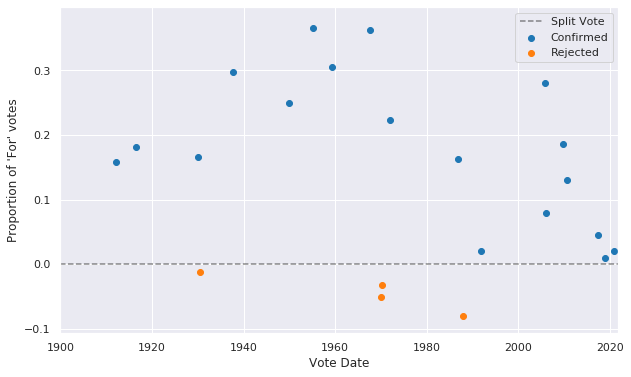

In [200]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_since(1900, fig, ax)
ax.get_xlim()


(1920.0, 2021.8333333333333)

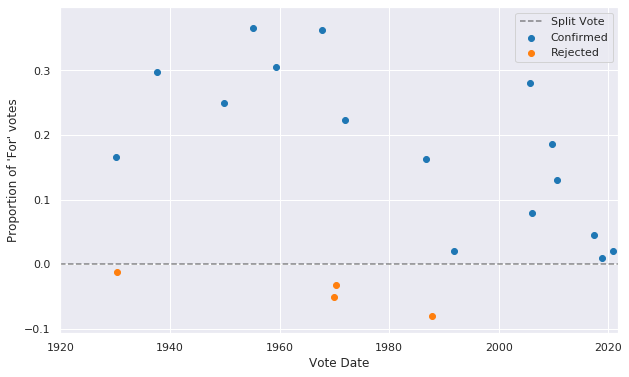

In [205]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_since(1920, fig, ax)
ax.get_xlim()